# Projeto 1 - Relatório de fechamento de mercado por e-mail.


### Desafio:

* Construção de um e-mail automático que chegue na caixa de entrada todos os dias com as informações de fechamento da ação de mercado que seja de interesse.

### Passo a passo:

   **Passo 1** - Importar os módulos e bibliotecas.
   
   **Passo 2** - Pegar dados do Ibovespa e do Dólar no Yahoo Finance.
   
   **Passo 3** - Manipular os dados para deixá-los nos formatos necessários para fazer as contas.
   
   **Passo 4** - Calcular o retorno diário, mensal e anual.
   
   **Passo 5** - Localizar, dentro das tabelas de retornos, os valores de fechamento de mercado que irão pro texto  anexado no e-mail.
   
   **Passo 6** - Fazer os gráficos dos ativos.
   
   **Passo 7** - Enviar o e-mail.


# Passo 1: Importando os módulos necessários

In [146]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib
from email.message import EmailMessage

# Passo 2: Pegar dados no Yahoo Finance

In [147]:
ativos = ["^BVSP", "BRL=X", 
          
      "ITSA4.SA",
      "BRAP3.SA",
      "BRAP4.SA",
      "QUAL3.SA",
      "VBBR3.SA",
      "WIZS3.SA",
      "BRSR6.SA",
      "AESB3.SA",
      "CSMG3.SA",
      "BRIV4.SA",
      "VALE3.SA",
      "TRPL4.SA",
      "VIVT3.SA",
      "SUZB3.SA" ]  

# o acento circunflexo em ibovespa é pq no yahoo finance o token já é definido desta forma
# 'BRL=X' é a comparação de real para dolar

hoje = datetime.datetime.now()  #pacote.biblioteca.função
um_ano_atras = hoje - datetime.timedelta(days = 365) #subtração a partir de hoje até 365 dias atrás 

dados_mercado = yf.download(ativos, um_ano_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  16 of 16 completed


Adj Close                                                     \
             AESB3.SA   BRAP3.SA   BRAP4.SA  BRIV4.SA   BRL=X   BRSR6.SA   
Date                                                                       
2022-04-04  12.012984  26.786425  30.182131  6.910803  4.6572  10.043026   
2022-04-05  11.745809  26.449377  29.712744  6.587005  4.5938   9.887815   
2022-04-06  11.429157  26.405029  29.872158  6.587005  4.6507   9.878686   
2022-04-07  11.439053  26.103460  29.668463  6.661016  4.7152   9.906075   
2022-04-08  11.478635  25.642235  29.092806  6.661016  4.7521   9.997375   
...               ...        ...        ...       ...     ...        ...   
2023-03-29   9.920000  24.320000  26.500000  9.210000  5.1644   9.660000   
2023-03-30   9.950000  24.840000  27.110001  9.210000  5.1342   9.960000   
2023-03-31   9.940000  24.549999  26.820000  9.500000  5.0927  10.000000   
2023-04-03   9.890000  24.530001  26.879999  9.500000  5.0623   9.820000   
2023-04-04   9.880000  24.330000  26.320000       NaN     NaN   9.950000   

                                                       ...     Volume  \
             CSMG3.SA  ITSA4.SA   QUAL3.SA   SUZB3.SA  ...   CSMG3.SA   
Date                                                   ...              
2022-04-04  12.685518  9.223463  16.153427  51.452988  ...  2870700.0   
2022-04-05  12.713017  8.982552  14.967406  51.500523  ...  2909700.0   
2022-04-06  12.951328  8.913721  14.428305  52.612869  ...  3270400.0   
2022-04-07  13.052152  8.836284  14.271476  51.785740  ...  2653200.0   
2022-04-08  13.620434  8.836284  14.261673  51.814262  ...  2373700.0   
...               ...       ...        ...        ...  ...        ...   
2023-03-29  15.520000  7.990000   3.780000  43.070000  ...  2728700.0   
2023-03-30  15.880000  8.160000   3.930000  43.049999  ...  2259700.0   
2023-03-31  15.730000  8.220000   3.680000  41.599998  ...  1696600.0   
2023-04-03  16.090000  8.090000   3.600000  42.740002  ...  2609800.0   
2023-04-04  16.299999  8.150000   3.640000  43.110001  ...   150600.0   

                                                                      \
              ITSA4.SA   QUAL3.SA    SUZB3.SA   TRPL4.SA    VALE3.SA   
Date                                                                   
2022-04-04  20241980.0  3783800.0   5450100.0  1428400.0  16914000.0   
2022-04-05  29871930.0  7778300.0   6634800.0  1315200.0  25764400.0   
2022-04-06  36652000.0  4790900.0   7346500.0  1818200.0  22615800.0   
2022-04-07  28432910.0  2956800.0   5138700.0  1493900.0  19946600.0   
2022-04-08  11475860.0  2820500.0   4374700.0   983900.0  26887400.0   
...                ...        ...         ...        ...         ...   
2023-03-29  20702800.0  8877700.0   3955700.0  2905100.0  17345200.0   
2023-03-30  17155100.0  7504500.0   5943600.0  1995900.0  14249000.0   
2023-03-31  21108900.0  6435800.0  14261800.0  2351400.0  22468400.0   
2023-04-03  24181800.0  5237600.0   6884200.0  2059200.0  13510200.0   
2023-04-04   1265300.0   940200.0    996400.0   197800.0   4610600.0   

                                                          
              VBBR3.SA   VIVT3.SA   WIZS3.SA       ^BVSP  
Date                                                      
2022-04-04   4444200.0  2011600.0  4188900.0   8812500.0  
2022-04-05   9568600.0  2641300.0  3763300.0  11788300.0  
2022-04-06  13597500.0  2068100.0  2552500.0  13410800.0  
2022-04-07   7055100.0  2335300.0  2405400.0  11520100.0  
2022-04-08   5257600.0  1805700.0  2035500.0  11225800.0  
...                ...        ...        ...         ...  
2023-03-29   8742900.0  1833700.0   501100.0  12456100.0  
2023-03-30  12355500.0  1951200.0   548500.0  14901600.0  
2023-03-31  19037200.0  3158900.0  1123800.0  15111200.0  
2023-04-03   8039200.0  2261200.0   909300.0  12794800.0  
2023-04-04    514500.0   126800.0        NaN         0.0  

[262 rows x 96 columns]

In [148]:
itau = yf.download("ITSA4.SA", um_ano_atras, hoje) #teste de yfinance
print(itau)


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2022-04-04  9.836363  9.836363  9.645454  9.745454   9.223463  20241980
2022-04-05  9.681818  9.700000  9.400000  9.490909   8.982552  29871930
2022-04-06  9.427272  9.481818  9.318181  9.418181   8.913720  36652000
2022-04-07  9.400000  9.400000  9.263636  9.336363   8.836282  28432910
2022-04-08  9.336363  9.372727  9.254545  9.336363   8.836282  11475860
...              ...       ...       ...       ...        ...       ...
2023-03-29  7.960000  8.020000  7.840000  7.990000   7.990000  20702800
2023-03-30  8.070000  8.190000  8.020000  8.160000   8.160000  17155100
2023-03-31  8.180000  8.300000  8.160000  8.220000   8.220000  21108900
2023-04-03  8.170000  8.200000  8.010000  8.090000   8.090000  24181800
2023-04-04  8.090000  8.160000  8.080000  8.150000   8.150000   126

# Passo 3.1: Manipulando os dados - seleção e exclusão de dados 

In [149]:
dados_fechamento = dados_mercado['Adj Close'] # somente fechamento de mercado
# dados_fechamento = dados_mercado['Adj Close']['ITSA4.SA'] ativo especifico 
#renomeando as colunas

dados_fechamento.columns = [    #o sistema puxa ordem alfabetica - não esquecer
'AES Brasil Energia',
'Bradespar Ord.',
'Bradespar Pref.',
'Banco Alfa',
'Dolar',
'Banco do Estado do RGS',
'Compania de Saneamento de MG.',
'Itausa SA Pref.',
'Qualicorp Consultoria',
'Suzano S.a.',
'CTEEP Cia Transm Energia Eletr',
'Vale S.A.',
'Vibra Energia',
'Telefônica Brasil',
'Wiz Soluções e Corretagem',
'Ibovespa'
]


dados_fechamento = dados_fechamento.dropna() #elimina valores nulos (feriados)
dados_fechamento

,AES Brasil Energia,Bradespar Ord.,Bradespar Pref.,Banco Alfa,Dolar,Banco do Estado do RGS,Compania de Saneamento de MG.,Itausa SA Pref.,Qualicorp Consultoria,Suzano S.a.,CTEEP Cia Transm Energia Eletr,Vale S.A.,Vibra Energia,Telefônica Brasil,Wiz Soluções e Corretagem,Ibovespa
Date,,,,,,,,,,,,,,,,
2022-04-04,12.012984,26.786425,30.182131,6.910803,4.6572,10.043026,12.685518,9.223463,16.153427,51.452988,25.472437,90.803886,22.824787,50.371201,8.842880,121280.0
2022-04-05,11.745809,26.449377,29.712744,6.587005,4.5938,9.887815,12.713017,8.982552,14.967406,51.500523,25.252766,88.180084,22.063328,50.940845,8.517090,118885.0
2022-04-06,11.429157,26.405029,29.872158,6.587005,4.6507,9.878686,12.951328,8.913721,14.428305,52.612869,25.013992,89.515167,21.425604,51.687912,8.414699,118228.0
2022-04-07,11.439053,26.103460,29.668463,6.661016,4.7152,9.906075,13.052152,8.836284,14.271476,51.785740,25.138153,90.052895,21.339939,50.567307,8.479856,118862.0
2022-04-08,11.478635,25.642235,29.092806,6.661016,4.7521,9.997375,13.620434,8.836284,14.261673,51.814262,25.472437,88.217171,21.016317,50.119064,8.181992,118322.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28,9.950000,24.230000,26.170000,9.150000,5.1971,9.680000,15.560000,7.910000,4.020000,42.279999,21.879999,79.370003,13.540000,39.550644,5.430000,101185.0
2023-03-29,9.920000,24.320000,26.500000,9.210000,5.1644,9.660000,15.520000,7.990000,3.780000,43.070000,21.690001,80.510002,13.850000,39.640236,5.440000,101793.0
2023-03-30,9.950000,24.840000,27.110001,9.210000,5.1342,9.960000,15.880000,8.160000,3.930000,43.049999,21.690001,81.820000,14.190000,39.889107,5.470000,103713.0


# Passo 3.2: Manipulando os dados - Criando tabelas com outros timeframes. 

In [150]:
dados_fechamento_mensal = dados_fechamento.resample("M").last() # month
dados_fechamento_anual = dados_fechamento.resample("Y").last()  # year

#resample muda a frequencia temporal, horas p minutos, anos p dias, etc.
#last é o ultimo valor

dados_fechamento_anual

,AES Brasil Energia,Bradespar Ord.,Bradespar Pref.,Banco Alfa,Dolar,Banco do Estado do RGS,Compania de Saneamento de MG.,Itausa SA Pref.,Qualicorp Consultoria,Suzano S.a.,CTEEP Cia Transm Energia Eletr,Vale S.A.,Vibra Energia,Telefônica Brasil,Wiz Soluções e Corretagem,Ibovespa
Date,,,,,,,,,,,,,,,,
2022-12-31,9.66,25.570000,29.719999,8.991343,5.2668,9.348103,14.718772,8.401359,5.87,48.240002,23.00,86.970047,15.55,37.089760,7.01,110031.0
2023-12-31,9.89,24.530001,26.879999,9.500000,5.0623,9.820000,16.090000,8.090000,3.60,42.740002,21.58,80.309998,14.08,38.119999,5.89,101506.0


# Passo 4 - Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos. 

In [151]:
retorno_no_ano = dados_fechamento_anual.pct_change().dropna()
retorno_no_mes = dados_fechamento_mensal.pct_change().dropna()
retorno_no_dia = dados_fechamento.pct_change().dropna()

# 'pct_change()' variação percentual 

retorno_no_ano.head()

,AES Brasil Energia,Bradespar Ord.,Bradespar Pref.,Banco Alfa,Dolar,Banco do Estado do RGS,Compania de Saneamento de MG.,Itausa SA Pref.,Qualicorp Consultoria,Suzano S.a.,CTEEP Cia Transm Energia Eletr,Vale S.A.,Vibra Energia,Telefônica Brasil,Wiz Soluções e Corretagem,Ibovespa
Date,,,,,,,,,,,,,,,,
2023-12-31,0.02381,-0.040673,-0.095559,0.056572,-0.038828,0.050481,0.093162,-0.03706,-0.386712,-0.114013,-0.061739,-0.076579,-0.094534,0.027777,-0.159772,-0.077478


# Passo 5 - Localizar o fechamento do dia anterior, retorno no mês e retorno no ano.

* Loc -> referenciar elementos a partir do nome   [nome da linha, nome da coluna]
* Iloc -> selecionar elementos como uma matriz      [numero da linha, numero da coluna]

In [152]:
empresa_de_interesse = "Vale"

retorno_dia_vale = retorno_no_dia.loc['2022-04-05', 'Vale S.A.'] 
retorno_mes_vale = retorno_no_mes.iloc[0,11]   
retorno_ano_vale = retorno_no_ano.iloc[0,11]

print(retorno_dia_vale )
print(retorno_mes_vale)
print(retorno_ano_vale)

-0.028895263062951537
0.035058263303717085
-0.07657865746238945


In [153]:
retorno_dia_vale = round(retorno_dia_vale * 100, 2)
retorno_mes_vale = round(retorno_mes_vale * 100, 2)
retorno_ano_vale = round(retorno_ano_vale * 100, 2)

print(retorno_dia_vale)
print(retorno_mes_vale)
print(retorno_ano_vale)

-2.89
3.51
-7.66


# Passo 6 - Fazer os gráficos da performance do último dos ativos

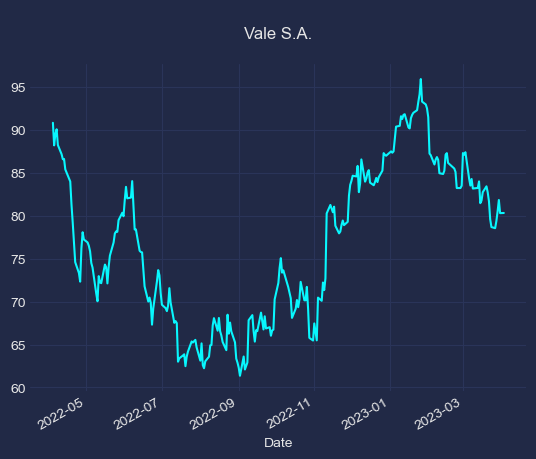

In [154]:
plt.style.use("cyberpunk")

#eixo Y é a cotação do próprio valor  (use_index true)
dados_fechamento.plot(y = 'Vale S.A.', use_index = True, legend = False)

plt.title("\nVale S.A.\n")

plt.savefig('vale.png', dpi = 300) #dpi é depuração de pixels

plt.show()

# Passo 7: Enviar e-mail

site que disponibiliza o python para logar com seu e-mail


https://myaccount.google.com/apppasswords

In [155]:
!pip install python-dotenv

In [156]:
import os #acessar as variaveis de ambientes (bloco de notas)
from dotenv import load_dotenv 

In [157]:
load_dotenv()   #true, o arquivo ta na pasta ambiente 

True

In [158]:
senha = os.environ.get("senha_gmail")
email = 'pulppor@gmail.com'

In [159]:
msg = EmailMessage() # 'EmailMessage' é usado para criar e enviar emails usando o módulo "smtplib" do Python

msg['Subject'] = "Enviando e-mail com o Python"
msg['From'] = 'pulppor@gmail.com'
msg['To'] = ['brenno@varos.com.br', 'pulppor@hotmail.com']

# Adicionando o corpo da mensagem
msg.set_content(f'''Prezado diretor, segue o relatório diário:

Bolsa:

No dia a {empresa_de_interesse} deu: {retorno_dia_vale}%, 
No mês a {empresa_de_interesse} deu: {retorno_mes_vale}%, 
No ano a {empresa_de_interesse} deu: {retorno_ano_vale}%, 

Abs,

O melhor estagiário do mundo

''')

In [160]:
# Anexando um arquivo, rb é um modo de leitura binária
with open('vale.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='vale.png')

In [161]:
# Enviando o email usando o servidor SMTP do Gmail
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    
    smtp.login(email, senha)
    smtp.send_message(msg)